##INTRODUCTION TO CONVOLUTIONAL NEURAL NETWORKS AND COMPUTER VISION WITH TENSORFLOW

In [ ]:
# Getting The Data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzipping The Downloaded File
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-07-21 05:29:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  44.5MB/s    in 2.3s    

2022-07-21 05:29:38 (44.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##INSPECTING THE DATA

In [ ]:
! ls pizza_steak

test  train


In [ ]:
! ls pizza_steak/train/

pizza  steak


In [ ]:
! ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"THERE ARE {len(dirnames)} DIRECTORIES AND {len(filenames)} IMAGES IN '{dirpath}'.")

In [ ]:
# Another Way To Find Out How Many Images Are In A File
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
# Getting The Classnames Programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


## CREATING FUNCTION TO VIEW RANDOM IMAGES

In [ ]:
# Visualizing Our Images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup The Target Directory
  target_folder = target_dir + target_class

  # Getting A Random Image Path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read In The Image And Plot It Using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off');

  print(f'IMAGE SHAPE: {img.shape}')
  return img

IMAGE SHAPE: (512, 424, 3)


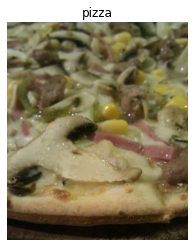

In [ ]:
# Viewing A Random Image From The Taining Dataset
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class = 'pizza')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 424, 3), dtype=uint8, numpy=
array([[[137, 133, 108],
        [138, 134, 109],
        [141, 135, 113],
        ...,
        [129, 133, 118],
        [126, 130, 115],
        [123, 127, 112]],

       [[136, 132, 107],
        [137, 133, 108],
        [139, 134, 112],
        ...,
        [121, 124, 107],
        [118, 121, 104],
        [116, 119, 102]],

       [[134, 130, 105],
        [135, 130, 108],
        [136, 131, 109],
        ...,
        [108, 110,  88],
        [106, 108,  86],
        [104, 106,  84]],

       ...,

       [[ 31,  24,  18],
        [ 30,  23,  17],
        [ 29,  22,  16],
        ...,
        [ 30,  28,  16],
        [ 28,  26,  14],
        [ 23,  21,   9]],

       [[ 35,  28,  22],
        [ 31,  24,  18],
        [ 27,  20,  14],
        ...,
        [ 33,  31,  19],
        [ 29,  26,  17],
        [ 20,  20,  10]],

       [[ 36,  29,  23],
        [ 29,  22,  16],
        [ 25,  18,  12],
        ...,
        [ 26,  26,  1

In [ ]:
img.shape

(512, 424, 3)

In [ ]:
# Getting All The Pixel Values B/w 0 and 1
img / 255.

array([[[0.5372549 , 0.52156863, 0.42352941],
        [0.54117647, 0.5254902 , 0.42745098],
        [0.55294118, 0.52941176, 0.44313725],
        ...,
        [0.50588235, 0.52156863, 0.4627451 ],
        [0.49411765, 0.50980392, 0.45098039],
        [0.48235294, 0.49803922, 0.43921569]],

       [[0.53333333, 0.51764706, 0.41960784],
        [0.5372549 , 0.52156863, 0.42352941],
        [0.54509804, 0.5254902 , 0.43921569],
        ...,
        [0.4745098 , 0.48627451, 0.41960784],
        [0.4627451 , 0.4745098 , 0.40784314],
        [0.45490196, 0.46666667, 0.4       ]],

       [[0.5254902 , 0.50980392, 0.41176471],
        [0.52941176, 0.50980392, 0.42352941],
        [0.53333333, 0.51372549, 0.42745098],
        ...,
        [0.42352941, 0.43137255, 0.34509804],
        [0.41568627, 0.42352941, 0.3372549 ],
        [0.40784314, 0.41568627, 0.32941176]],

       ...,

       [[0.12156863, 0.09411765, 0.07058824],
        [0.11764706, 0.09019608, 0.06666667],
        [0.11372549, 0

## END-TO-END EXAMPLE

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# setting The Random Seed
tf.random.set_seed(42)

# Setup Paths To Our Data Directories
train_dir = '/content/pizza_steak/train'
test_dir = '/content/pizza_steak/test'

# PREPROCESSING DATA (SCALING/NORMALIZATION)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Importing Data From Directories And Turning It Into Batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# 1. Building A CNN Model
model_1 = tf.keras.Sequential([
      tf.keras.layers.Conv2D(filters=10,
                             kernel_size=3, 
                             activation='relu',
                             input_shape=(224, 224, 3)), 
      tf.keras.layers.Conv2D(10, 3, activation='relu'),
      tf.keras.layers.MaxPool2D(pool_size=2,
                                 padding='valid'),
      tf.keras.layers.Conv2D(10, 3, activation='relu'),
      tf.keras.layers.Conv2D(10, 3, activation='relu'),
      tf.keras.layers.MaxPool2D(2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='sigmoid')                                              
])

# 2. Compiling The Model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fitting The Model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 25s 210ms/step - loss: 0.5512 - accuracy: 0.7073 - val_loss: 0.3801 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4204 - accuracy: 0.8093 - val_loss: 0.3496 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4047 - accuracy: 0.8147 - val_loss: 0.3397 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3556 - accuracy: 0.8500 - val_loss: 0.3473 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3227 - accuracy: 0.8740 - val_loss: 0.3611 - val_accuracy: 0.8340


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### USING THE SAME MODEL AS BEFORE

In [ ]:
tf.random.set_seed(42)

# 1. Creating A Model To Replicate The Tensorflow Playground
model_2 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(4, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compiling The Model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fitting The Model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 189ms/step - loss: 1.5736 - accuracy: 0.4960 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6932 - accuracy: 0.4893 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


###IMPROVING MODEL 2

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(224, 224, 3)),                        
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(100, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')                         
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 3.9672 - accuracy: 0.5827 - val_loss: 1.1550 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 9s 182ms/step - loss: 0.8594 - accuracy: 0.6873 - val_loss: 0.8715 - val_accuracy: 0.6800
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.7930 - accuracy: 0.7060 - val_loss: 0.7162 - val_accuracy: 0.6300
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.5353 - accuracy: 0.7540 - val_loss: 0.4898 - val_accuracy: 0.7640
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.5034 - accuracy: 0.7787 - val_loss: 0.4116 - val_accuracy: 0.8060


##BINARY CLASSIFICATION

###1. BECOMING ONE WITH THE DATA

IMAGE SHAPE: (512, 512, 3)
IMAGE SHAPE: (512, 510, 3)


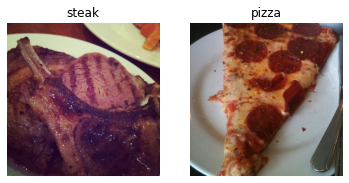

In [ ]:
# Visualizing Data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. PREPROCESSING THE DATA

In [ ]:
# Defining Directory Dataset Paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test'

In [ ]:
!nvidia-smi

Thu Jul 21 05:32:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    27W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Creating Train And Test Data Generators And Rescale The Data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Loading In Our Image Data From Directories And Turning Them Into Batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Getting A Sample Of A train data Batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# How Many Batches Are There?
len(train_data)

47

In [ ]:
# Get The First Two Images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# Viewing The First Batch Of Labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. CREATING A CNN MODEL (STARTING WITH A BASELINE)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Creating The Model
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid')                 
])

In [ ]:
# Compiling The Model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


###FITTING THE MODEL

In [ ]:
# Checking The Lengths Of Training And Test Data Generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fitting The Model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 209ms/step - loss: 1.0796 - accuracy: 0.6760 - val_loss: 0.4664 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 10s 202ms/step - loss: 0.4430 - accuracy: 0.8040 - val_loss: 0.3802 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 10s 202ms/step - loss: 0.3221 - accuracy: 0.8753 - val_loss: 0.4129 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 10s 202ms/step - loss: 0.1335 - accuracy: 0.9620 - val_loss: 0.4732 - val_accuracy: 0.7840
Epoch 5/5
47/47 [==============================] - 10s 205ms/step - loss: 0.0389 - accuracy: 0.9933 - val_loss: 0.5681 - val_accuracy: 0.7980


### 5. EVALUATING OUR MODEL

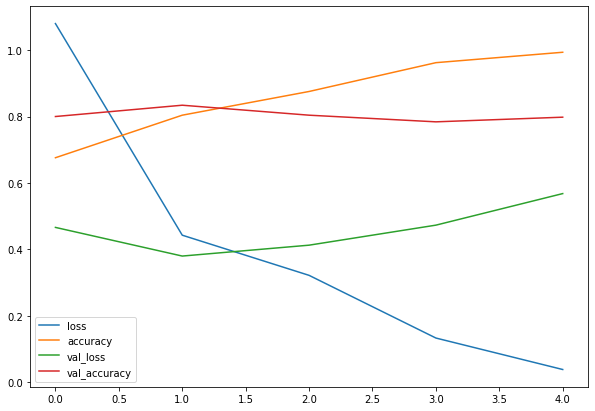

In [ ]:
# Plotting The Training Curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plotting The Validation And Training Curves Separately

def plot_loss_curves(history):
  """
  Returns Separate Loss Curves For Training And Validation Metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plotting Loss
  plt.plot(epochs, loss, label='TRAINING_LOSS')
  plt.plot(epochs, val_loss, label='VAL_LOSS')
  plt.title('LOSS')
  plt.xlabel('EPOCHS')
  plt.legend()

  # Plotting Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='TRAINING_ACCURACY')
  plt.plot(epochs, val_loss, label='VAL_ACCURACY')
  plt.title('ACCURACY')
  plt.xlabel('EPOCHS')
  plt.legend()

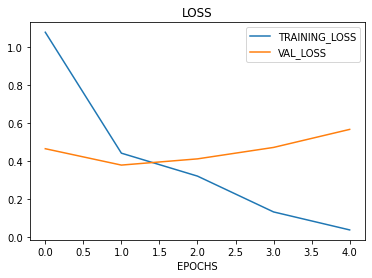

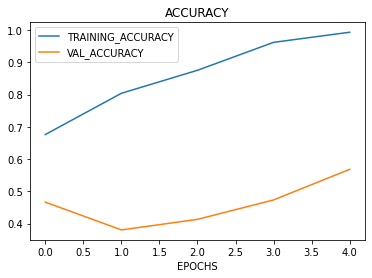

In [ ]:
# Checking The Loss And Accuracy Of model_4
plot_loss_curves(history_4)

###6. ADJUSTING THE MODEL PARAMETERS

In [ ]:
# 1. Creating The Model
model_5 = Sequential([
      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
      MaxPool2D(pool_size=2),
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(), 
      Conv2D(10, 3, activation='relu'),
      MaxPool2D(),
      Flatten(),
      Dense(1, activation='sigmoid')            
])

In [ ]:
# 2. Compiling The Model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# 3. Fitting The Model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 306ms/step - loss: 0.6172 - accuracy: 0.6580 - val_loss: 0.4985 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 9s 193ms/step - loss: 0.4747 - accuracy: 0.7753 - val_loss: 0.4213 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4174 - accuracy: 0.8247 - val_loss: 0.3465 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3845 - accuracy: 0.8400 - val_loss: 0.3683 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3651 - accuracy: 0.8440 - val_loss: 0.3137 - val_accuracy: 0.8880


In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

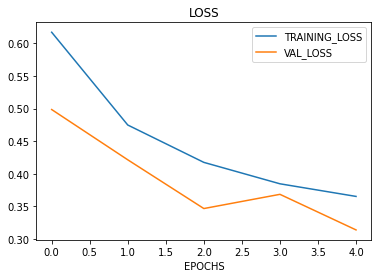

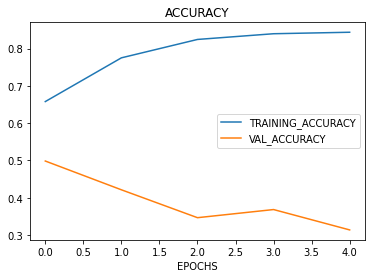

In [ ]:
# Plotting Loss Curves
plot_loss_curves(history_5)

###7. REDUCING OVERFITTING WITH DATA AUGMENTATION

In [ ]:
# Creating ImageDataGenerator Training Instance With Data Augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.3,
                                   horizontal_flip=True)


# Creating ImageDatagenerator Without Data Augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Creating ImageDataGenerator Without Data Augmentation For The Test Dataset
test_datagen = ImageDataGenerator(rescale=1/255.) 

###8. VISUALIZING OUR AUGMENTED DATA

In [ ]:
# Importing Data And Augment It From Training Directory
print('AUGMENTED TRAINING DATA:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

# Creating Non-Augmented Train Data Batches
print('NON-AUGMENTED TRAINING DATA:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Creating Non-Augmented Test Data Batches
IMG_SIZE = (224, 224)
print('NON-AUGMENTED TEST DATA:')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary')

AUGMENTED TRAINING DATA:
Found 1500 images belonging to 2 classes.
NON-AUGMENTED TRAINING DATA:
Found 1500 images belonging to 2 classes.
NON-AUGMENTED TEST DATA:
Found 500 images belonging to 2 classes.


In [ ]:
# Getting Sample Data Batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

SHOWING IMAGE NUMBER: 25


(-0.5, 223.5, 223.5, -0.5)

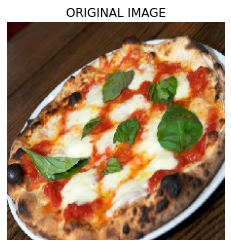

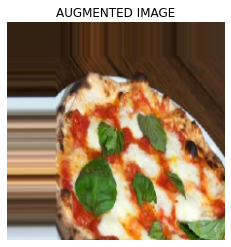

In [ ]:
# Showing Original Image And Augmented Image
import random
random_number = random.randint(0, 31)
print(f'SHOWING IMAGE NUMBER: {random_number}')
plt.imshow(images[random_number])
plt.title(f'ORIGINAL IMAGE')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'AUGMENTED IMAGE')
plt.axis(False)

##CREATING A MODEL ON AUGMENTED DATA

In [ ]:
# Creating The Model
model_6 = Sequential([
   Conv2D(10, 3, activation='relu'),
   MaxPool2D(pool_size=2),
   Conv2D(10, 3, activation='relu'),
   MaxPool2D(),
   Conv2D(10, 3, activation='relu'),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation='sigmoid')                  
])

# Compiling The Model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting The Model
history_6 = model_6.fit(train_data_augmented,
                        epochs=6,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/6
47/47 [==============================] - 23s 487ms/step - loss: 0.7031 - accuracy: 0.4647 - val_loss: 0.6824 - val_accuracy: 0.5760
Epoch 2/6
47/47 [==============================] - 23s 468ms/step - loss: 0.6921 - accuracy: 0.5267 - val_loss: 0.6690 - val_accuracy: 0.7040
Epoch 3/6
47/47 [==============================] - 22s 472ms/step - loss: 0.6721 - accuracy: 0.6413 - val_loss: 0.5940 - val_accuracy: 0.7200
Epoch 4/6
47/47 [==============================] - 22s 474ms/step - loss: 0.6965 - accuracy: 0.5927 - val_loss: 0.6381 - val_accuracy: 0.6580
Epoch 5/6
47/47 [==============================] - 22s 471ms/step - loss: 0.6924 - accuracy: 0.5407 - val_loss: 0.6268 - val_accuracy: 0.7540
Epoch 6/6
47/47 [==============================] - 22s 476ms/step - loss: 0.6607 - accuracy: 0.6380 - val_loss: 0.5847 - val_accuracy: 0.6520


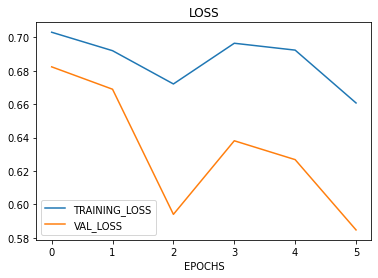

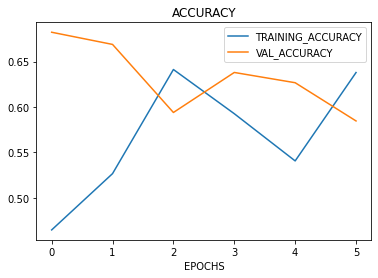

In [ ]:
# Checking Our Model's Training Curves
plot_loss_curves(history_6)

###SHUFFLING OUR AUGMENTED TRAINING DATA

In [ ]:
# Importing Data And Augmenting It And Shuffling From Training Directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   class_mode='binary',
                                                                   batch_size=32,
                                                                   shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Creating The Model
model_7 = Sequential([
     Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compiling The Model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting The Model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 494ms/step - loss: 0.6571 - accuracy: 0.6020 - val_loss: 0.6201 - val_accuracy: 0.6360
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6012 - accuracy: 0.6887 - val_loss: 0.5080 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 30s 635ms/step - loss: 0.5242 - accuracy: 0.7367 - val_loss: 0.4008 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 23s 492ms/step - loss: 0.5166 - accuracy: 0.7467 - val_loss: 0.4634 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 23s 487ms/step - loss: 0.4928 - accuracy: 0.7713 - val_loss: 0.3342 - val_accuracy: 0.8540


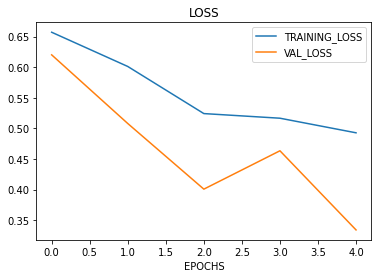

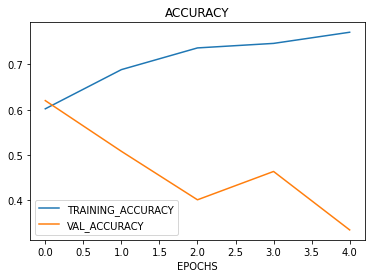

In [ ]:
# Plotting Loss Curves
plot_loss_curves(history_7) 

##MAKING A PREDICTION WITH OUR TRAINED MODEL ON OUR OWN CUSTOM DATA

In [ ]:
print(class_names) 

['pizza' 'steak']


--2022-07-21 06:33:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2022-07-21 06:33:47 (232 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



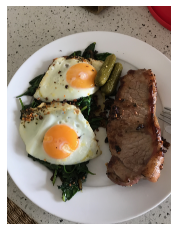

In [ ]:
# Viewing Our Example Images
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

##CREATING A FUNCTION TO IMPORT AN IMAGE AND RESIZE IT

In [ ]:
# CREATING A FUNCTION TO IMPORT AN IMAGE AND RESIZE IT, TO BE ABLE TO BE USED WITH OUR MODEL
def load_and_prep_image(filename, img_shape=224):
  """
  READS AN IMAGE FROM FILENAME, TURNS IT INTO A TENSOR AND RESHAPES IT
  TO (img_shape, img_shape, colour_channels)
  """
  # Reading In The Image
  img = tf.io.read_file(filename)
  # Decoding A Read File Into A Tensor
  img = tf.image.decode_image(img)
  # Resizing The Image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescaling The Image (Getting All Values B/W 0 and 1)
  img = img/255.
  return img

In [ ]:
# Loading And Preprocessing Our Custom Image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.8981126]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We Can Index The Predicted Class By Rounding The Prediction Probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

## CREATING A FUNCTION TO PREDICT AND PLOT THE CUSTOM IMAGE

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  
  """
  Imports An Image Located At Filename, Makes A Prediction With Model
  And Plots The Image With The Predicted Class As The Title
  """

  # Importing the Target Image And Preprocessing It
  img = load_and_prep_image(filename)

  # Make A Prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Getting The Predicted Class
  pred_class = class_names[int(tf.round(pred))]

  # Plotting The Image And Predicted Class
  plt.imshow(img)
  plt.title(f'PREDICTION: {pred_class}')
  plt.axis(False);

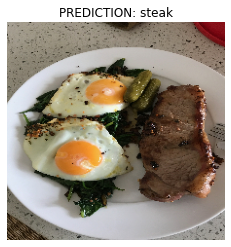

In [ ]:
# Testing Our Model On A Custom Image
pred_and_plot(model_7, '03-steak.jpeg')

--2022-07-21 07:26:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.02s   

2022-07-21 07:26:14 (175 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



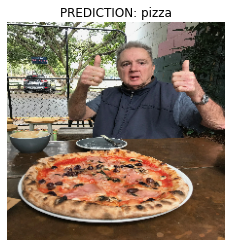

In [ ]:
# Downloading Another Test Custom Image And Make A Prediction On It
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, '03-pizza-dad.jpeg')

##MULTI - CLASS IMAGE CLASSIFICATION

###1. IMPORT AND BECOME ONE WITH THE DATA

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzipping Our Data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2022-07-21 12:28:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.197.128, 173.194.74.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   237MB/s    in 2.1s    

2022-07-21 12:28:29 (237 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk Through 10 Classes Of Food Image Data
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"THERE ARE {len(dirnames)} DIRECTORIES AND {len(filenames)} IMAGES IN '{dirpath}'.")

THERE ARE 2 DIRECTORIES AND 0 IMAGES IN '10_food_classes_all_data'.
THERE ARE 10 DIRECTORIES AND 0 IMAGES IN '10_food_classes_all_data/train'.
THERE ARE 0 DIRECTORIES AND 750 IMAGES IN '10_food_classes_all_data/train/ramen'.
THERE ARE 0 DIRECTORIES AND 750 IMAGES IN '10_food_classes_all_data/train/hamburger'.
THERE ARE 0 DIRECTORIES AND 750 IMAGES IN '10_food_classes_all_data/train/fried_rice'.
THERE ARE 0 DIRECTORIES AND 750 IMAGES IN '10_food_classes_all_data/train/sushi'.
THERE ARE 0 DIRECTORIES AND 750 IMAGES IN '10_food_classes_all_data/train/steak'.
THERE ARE 0 DIRECTORIES AND 750 IMAGES IN '10_food_classes_all_data/train/ice_cream'.
THERE ARE 0 DIRECTORIES AND 750 IMAGES IN '10_food_classes_all_data/train/chicken_wings'.
THERE ARE 0 DIRECTORIES AND 750 IMAGES IN '10_food_classes_all_data/train/chicken_curry'.
THERE ARE 0 DIRECTORIES AND 750 IMAGES IN '10_food_classes_all_data/train/grilled_salmon'.
THERE ARE 0 DIRECTORIES AND 750 IMAGES IN '10_food_classes_all_data/train/pizza'.

In [ ]:
# Setting Up The Train And Test Directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [ ]:
# Let's Get The Class Names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


IMAGE SHAPE: (512, 384, 3)


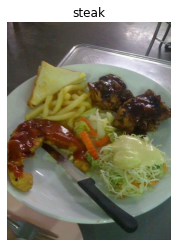

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

###PREPROCESSING THE DATA

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load Data From Directories And Turn It Into Batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


###BUILDING A MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [ ]:
# 1. Creating The Model
model_8 = Sequential([
     Conv2D(10, 3, activation='relu', input_shape=(224 ,224, 3)),
     Conv2D(10, 3, activation='relu'),
     MaxPool2D(),
     Conv2D(10, 3, activation='relu'),
     Conv2D(10, 3, activation='relu'),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation='softmax')
])

# 2. Compiling The Model
model_8.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fitting The Model
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 60s 201ms/step - loss: 2.2117 - accuracy: 0.1911 - val_loss: 2.0660 - val_accuracy: 0.2564
Epoch 2/5
235/235 [==============================] - 46s 196ms/step - loss: 1.9842 - accuracy: 0.2977 - val_loss: 2.0461 - val_accuracy: 0.2652
Epoch 3/5
235/235 [==============================] - 46s 198ms/step - loss: 1.6757 - accuracy: 0.4345 - val_loss: 2.0714 - val_accuracy: 0.3076
Epoch 4/5
235/235 [==============================] - 47s 198ms/step - loss: 1.0716 - accuracy: 0.6431 - val_loss: 2.4820 - val_accuracy: 0.2876
Epoch 5/5
235/235 [==============================] - 46s 197ms/step - loss: 0.4204 - accuracy: 0.8667 - val_loss: 3.3184 - val_accuracy: 0.2792


###EVALUATING THE MODEL

In [ ]:
# Evaluating On The Test Data
model_8.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 3.3184 - accuracy: 0.2792


[3.31843900680542, 0.2791999876499176]

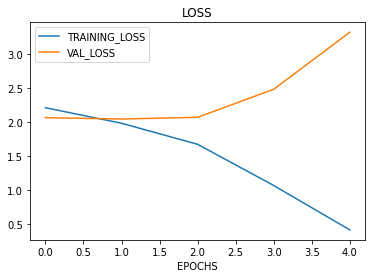

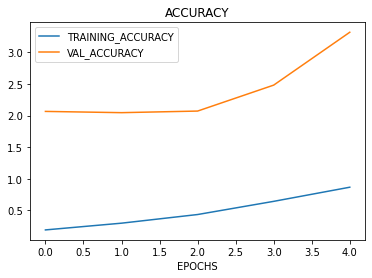

In [ ]:
# Checking Out The model's Loss Curves On The 10 Classes
plot_loss_curves(history_8)

###ADJUST THE MODEL HYPERPARAMETERS (TO BEAT THE BASELINE / REDUCE OVERFITTING)

In [ ]:
# SIMPLIFYING THE MODEL

# 1. Creating The Model
model_9 = Sequential([
     Conv2D(10, 3, activation='relu', input_shape=(224 ,224, 3)),
     MaxPool2D(),
     Conv2D(10, 3, activation='relu'),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation='softmax')
])

# 2. Compiling The Model
model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fitting The Model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 48s 199ms/step - loss: 2.1036 - accuracy: 0.2548 - val_loss: 1.9217 - val_accuracy: 0.3320
Epoch 2/5
235/235 [==============================] - 56s 240ms/step - loss: 1.7818 - accuracy: 0.3972 - val_loss: 1.8525 - val_accuracy: 0.3628
Epoch 3/5
235/235 [==============================] - 47s 199ms/step - loss: 1.4368 - accuracy: 0.5287 - val_loss: 1.9138 - val_accuracy: 0.3472
Epoch 4/5
235/235 [==============================] - 44s 188ms/step - loss: 0.9593 - accuracy: 0.6927 - val_loss: 2.1845 - val_accuracy: 0.3276
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.5317 - accuracy: 0.8471 - val_loss: 2.6744 - val_accuracy: 0.3112


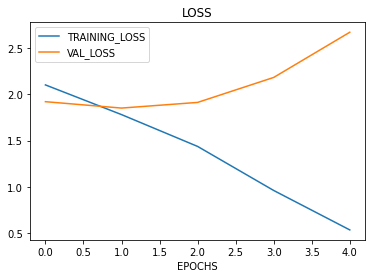

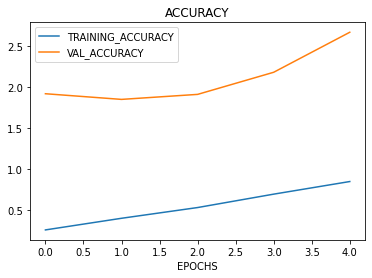

In [ ]:
# Checking The Loss Curves
plot_loss_curves(history_9)

###REDUCING OVERFITTING WITH DATA AUGMENTATION

In [ ]:
# Creating ImageDataGenerator Training Instance With Data Augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.3,
                                   horizontal_flip=True)



train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = tf.keras.models.clone_model(model_8)

# Compiling The Cloned Model
model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fitting The Model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 139s 582ms/step - loss: 0.3212 - accuracy: 0.1739 - val_loss: 0.2989 - val_accuracy: 0.2652
Epoch 2/5
235/235 [==============================] - 115s 490ms/step - loss: 0.3062 - accuracy: 0.2352 - val_loss: 0.3017 - val_accuracy: 0.2676
Epoch 3/5
235/235 [==============================] - 126s 538ms/step - loss: 0.3017 - accuracy: 0.2519 - val_loss: 0.2872 - val_accuracy: 0.3112
Epoch 4/5
235/235 [==============================] - 120s 511ms/step - loss: 0.2987 - accuracy: 0.2748 - val_loss: 0.2847 - val_accuracy: 0.3268
Epoch 5/5
235/235 [==============================] - 131s 558ms/step - loss: 0.2964 - accuracy: 0.2803 - val_loss: 0.2827 - val_accuracy: 0.3212


In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 0.2827 - accuracy: 0.3212


[0.28274503350257874, 0.32120001316070557]

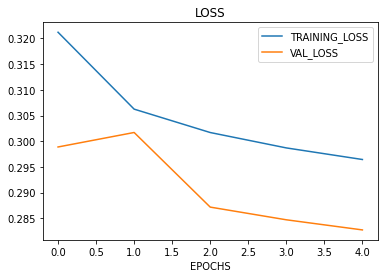

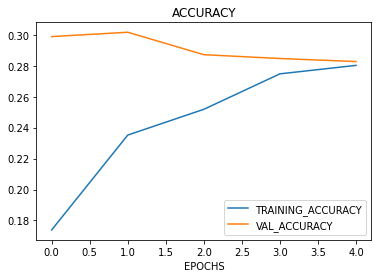

In [ ]:
plot_loss_curves(history_10)

###MAKING A PREDICTION WITH CUSTOM IMAGES

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2022-07-21 13:06:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.07s   

2022-07-21 13:06:18 (47.2 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-07-21 13:06:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

In [ ]:
# CREATING A FUNCTION TO PREDICT AND PLOT THE CUSTOM IMAGE

def pred_and_plot(model, filename, class_names=class_names):
  
  """
  Imports An Image Located At Filename, Makes A Prediction With Model
  And Plots The Image With The Predicted Class As The Title
  """

  # Importing the Target Image And Preprocessing It
  img = load_and_prep_image(filename)

  # Make A Prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Adding Logic For Multi-Class And Get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]


  # Plotting The Image And Predicted Class
  plt.imshow(img)
  plt.title(f'PREDICTION: {pred_class}')
  plt.axis(False);

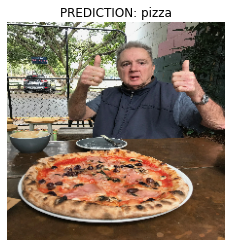

In [ ]:
# Making A Prediction Using The Trained Model
pred_and_plot(model=model_10,
              filename='03-pizza-dad.jpeg',
              class_names=class_names)

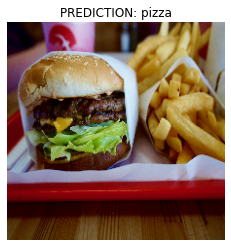

In [ ]:
# Making A Prediction Using The Trained Model
pred_and_plot(model=model_10,
              filename='03-hamburger.jpeg',
              class_names=class_names)

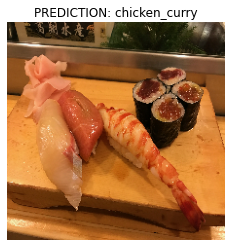

In [ ]:
pred_and_plot(model=model_10,
              filename='03-sushi.jpeg',
              class_names=class_names)

##SAVING AND LOADING OUR PRE-TRAINED MODELS

In [ ]:
# Saving A Model
model_10.save('SAVED_TRAINED_model_10')

INFO:tensorflow:Assets written to: SAVED_TRAINED_model_10/assets


INFO:tensorflow:Assets written to: SAVED_TRAINED_model_10/assets


In [ ]:
# Loading The Saved Model ANd Evaluating It
loaded_model = tf.keras.models.load_model('SAVED_TRAINED_model_10')